In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN


In [2]:
#Read the data set
crime=pd.read_csv("crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [7]:
crime.drop(crime.iloc[:,:1],axis=1,inplace=True)
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


# Scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
new_features=scaler.fit_transform(crime.iloc[:,:4])
new_features

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

# Agglomerative Clustering
(Heirarchical clustering)

In [79]:
from scipy.cluster.hierarchy import linkage
from pandas.core.common import random_state
import scipy.cluster.hierarchy as sch

# Dendrogram

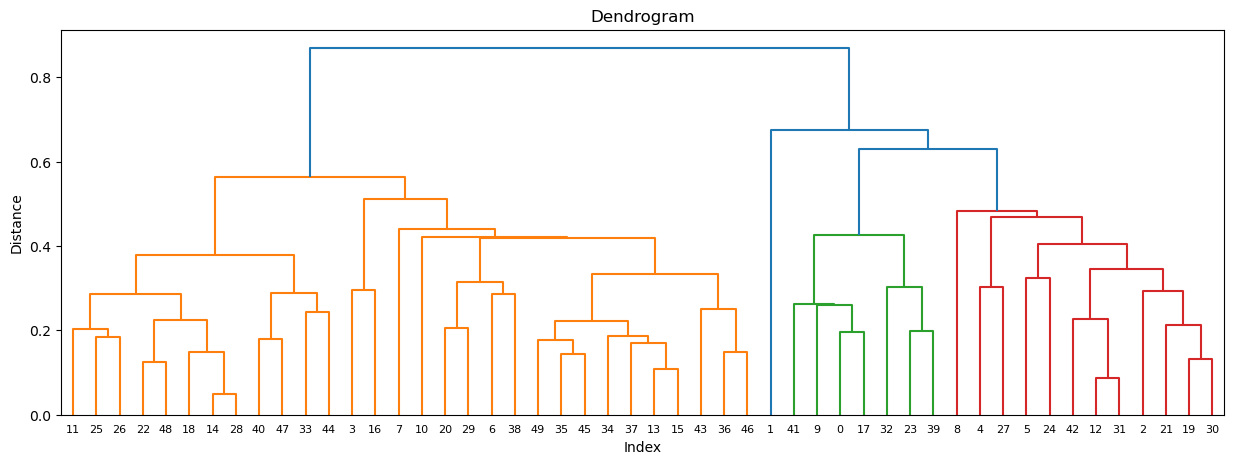

In [80]:
Z = linkage(new_features, method='average', metric= 'euclidean')
plt.figure(figsize=(15,5))
plt.title("Dendrogram")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(Z, leaf_rotation=0, leaf_font_size=8)
plt.show()

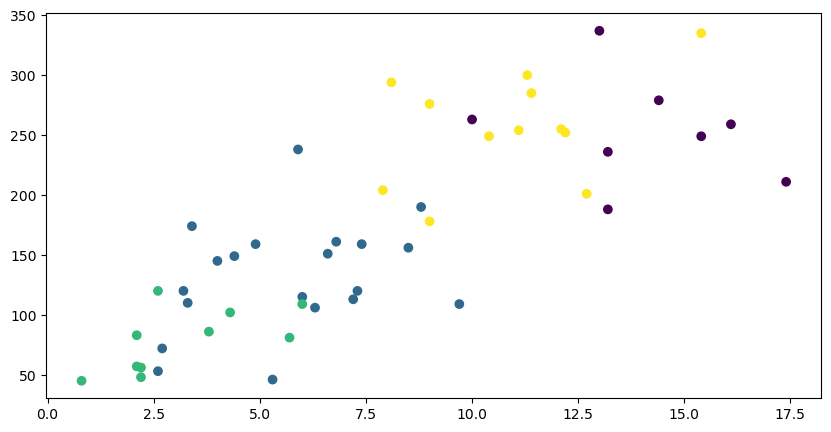

In [26]:
cluster=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
label=cluster.fit_predict(new_features)
plt.figure(figsize=(10,5))
plt.scatter(crime["Murder"],crime["Assault"],c=label)

In [23]:
clu=pd.DataFrame(label,columns=['clu'])
crime['Cluster']=cluster.labels_
crime.head(10)

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,3
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,3
9,17.4,211,60,25.8,0


In [24]:
crime.groupby(crime.Cluster).mean()

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,14.087500,252.750000,53.500000,24.5375
1,5.715000,132.300000,70.800000,18.1000
2,3.180000,78.700000,49.300000,11.6300
3,10.883333,256.916667,78.333333,32.2500


# KMeans Clustering

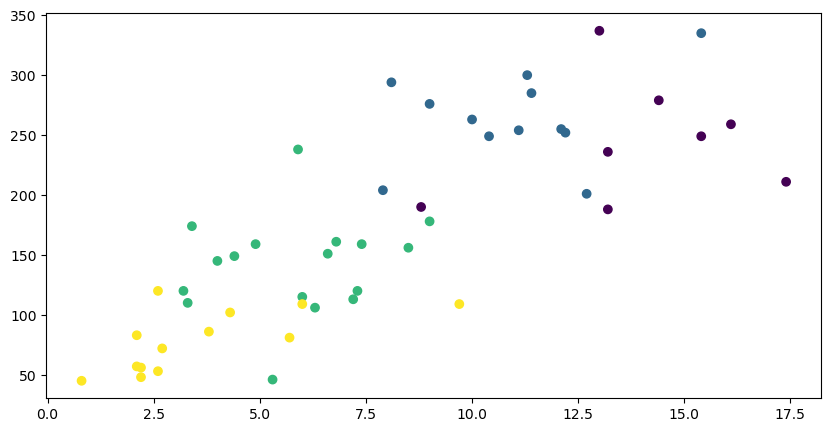

In [28]:
cluster=KMeans(n_clusters=4)
label=cluster.fit_predict(new_features)
plt.figure(figsize=(10,5))
plt.scatter(crime["Murder"],crime["Assault"],c=label)

In [31]:
label

array([0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 3, 1, 2, 3, 2, 3, 0, 3, 1, 2, 1,
       3, 0, 2, 3, 3, 1, 3, 2, 1, 1, 0, 3, 2, 2, 2, 2, 2, 0, 3, 0, 1, 2,
       3, 2, 2, 3, 3, 2])

# Elbow Method

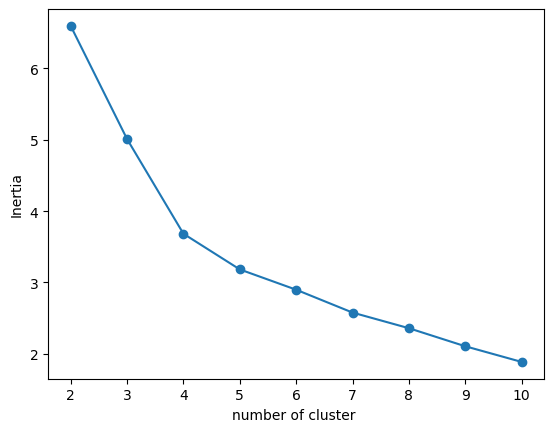

In [32]:
nc=range(2,11)
inertia=[]
for i in nc:
    cluster=KMeans(n_clusters=i)
    label=cluster.fit_predict(new_features)
    inertia.append(cluster.inertia_    )
    
plt.scatter(nc,inertia)   
plt.plot(nc,inertia)  
plt.xticks(nc)
plt.xlabel("number of cluster ")
plt.ylabel("Inertia")
plt.show()

# DBSCAN Clustering

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
crime_db=scaler.fit_transform(crime.iloc[:,:4])
crime_db

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

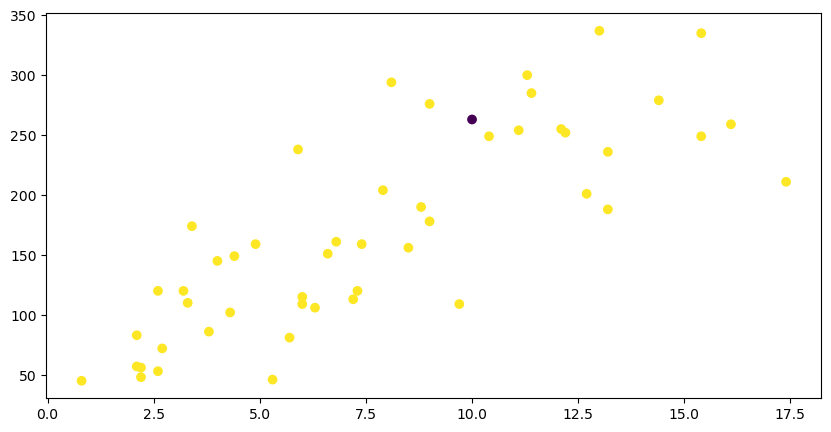

In [44]:
cluster=DBSCAN(eps=2,min_samples=7)
label=cluster.fit_predict(crime_db)
plt.figure(figsize=(10,5))
plt.scatter(crime["Murder"],crime["Assault"],c=label)

In [45]:
label

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [48]:
crime['Cluster']=cluster.labels_
crime.head(5)
#Second record is noise 

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0


# Silhouette Score

In [50]:
from sklearn.metrics import silhouette_score

In [69]:
import numpy as np
eps=np.linspace(0.1,1,50)
min_samples=range(2,50)
sil=[]
for i in eps:
    for j in min_samples:
        cluster=DBSCAN(eps=i,min_samples=j)
        label=cluster.fit_predict(crime_db)
        if len(set(label))>1:
             sil.append([i,j,silhouette_score(crime_db,label)   ] )
                

In [70]:
import pandas as pd
pd.DataFrame(sil,columns=["EPS","N","Silhouette_Score"]).sort_values(["Silhouette_Score"],ascending=False)

,EPS,N,Silhouette_Score
118,0.908163,5,0.266782
117,0.908163,4,0.266782
125,0.926531,5,0.266782
110,0.889796,4,0.266782
133,0.944898,5,0.266782
...,...,...,...
17,0.522449,2,-0.247044
16,0.504082,2,-0.268993
13,0.448980,2,-0.299868
14,0.467347,2,-0.299868
